# Лабораторная работа №1
## Сравнение различных подходов к хешированию

Седунов Илья,<br>
Альперович Вадим,<br>
17ПМИ


**Целью данной работы является сравнение различных методов борьбы с коллизиями:**

1) Метод цепочек;

2) Метод открытой адресации

3) Метод кукушки 

4) Cравнения со стандартными средствами языка c++: std::map, std::hash_map.

**Что измеряется?**

1) Время вставки;

2) Время удаления;

3) Время поиска.


**Входные данные:**

a) Случайные натуральные числа.

б) Случайные строки.

с) Real life данные

**Unit tets: Chained Hash map**

Test 1 is PASSED

Test 2 is PASSED

Test 3 is PASSED

Test 4 is PASSED

**Unit tets: Chained Hash map (string)**

Test 1 is PASSED

Test 2 is PASSED

Test 3 is PASSED

Test 4 is PASSED

**Unit tets: Opened Hash map __LINEAR__**

Test 1 is PASSED

Test 2 is PASSED

Test 3 is PASSED

Test 4 is PASSED

**Unit tets: Opened Hash map __QUADRATIC__**


Test 1 is PASSED

Test 2 is PASSED

Test 3 is FAILED

Test 4 is PASSED

**Unit tets: Opened Hash map __DOUBLE__**

Test 1 is PASSED

Test 2 is PASSED

Test 3 is PASSED

Test 4 is PASSED

**Unit tets: Opened Hash map __LINEAR__ (string)**

Test 1 is PASSED

Test 2 is PASSED

Test 3 is PASSED

Test 4 is PASSED

**Unit tets: Opened Hash map __QUADRATIC__ (string)**


Test 1 is PASSED

Test 2 is PASSED

Test 3 is PASSED

Test 4 is PASSED

**Unit tets: Opened Hash map __DOUBLE__ (string)**

Test 1 is PASSED

Test 2 is PASSED

Test 3 is PASSED

Test 4 is PASSED

**Unit tets: Cuckoo Hash map**

Test 1 is PASSED

Test 2 is PASSED

Test 3 is PASSED

Test 4 is PASSED

**Unit tets: Cuckoo Hash map (string)**


Test 1 is PASSED

Test 2 is PASSED

Test 3 is PASSED

Test 4 is PASSED


**Stress tets: Chained Hash map**
SUCCESS


**Stress tets: Opened Hash map __LINEAR__**
SUCCESS


**Stress tets: Opened Hash map __QUADRATIC__**
SUCCESS


**Stress tets: Opened Hash map __DOUBLE__**
SUCCESS


**Stress tets: Cuckoo Hash Map**
SUCCESS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
performanceIntegerM2N = pd.read_csv('data/output/integerPerformanceM2N_1.csv')
performanceIntegerM2N['MtoN'] = performanceIntegerM2N['TableSize'] / performanceIntegerM2N['DataSize']

performanceStringM2N = pd.read_csv('data/output/stringPerformanceM2N_1.csv')
performanceStringM2N['MtoN'] = performanceStringM2N['TableSize'] / performanceStringM2N['DataSize']

performanceIntegerM4N = pd.read_csv('data/output/integerPerformanceM4N_1.csv')
performanceIntegerM4N['MtoN'] = performanceIntegerM4N['TableSize'] / performanceIntegerM4N['DataSize']

performanceStringM4N = pd.read_csv('data/output/stringPerformanceM4N_1.csv')
performanceStringM4N['MtoN'] = performanceStringM4N['TableSize'] / performanceStringM4N['DataSize']

performanceIntegerM6N = pd.read_csv('data/output/integerPerformanceM6N_1.csv')
performanceIntegerM6N['MtoN'] = performanceIntegerM6N['TableSize'] / performanceIntegerM6N['DataSize']

performanceStringM6N = pd.read_csv('data/output/stringPerformanceM6N_1.csv')
performanceStringM6N['MtoN'] = performanceStringM6N['TableSize'] / performanceStringM6N['DataSize']

# performanceStringM2N.head()

In [19]:
def get_charts(df, groups):
    for group in groups.keys():
        df.plot(x='TableSize', 
                y=groups[group], 
                grid=True,
                figsize=(14, 5)
            )
        plt.title(group + ' operation (M = %dN) '%(df['MtoN'].iloc[0]))
        plt.ylabel('Average Time (micros)')
        pass
groups = {'std::map':
              ['insertStdMap', 'searchStdMap', 'deleteStdMap'],
          'std::hash_map':
              ['insertStdHashMap', 'searchStdHashMap', 'deleteStdHashMap'],
          'insert': 
              ['insertStdMap', 'insertStdHashMap','insertChained', 'insertOpened_linear', 'insertOpened_quadratic', 'insertOpened_double', 'insertCuckoo'],
#           'insert (without Cuckoo)': 
#               ['insertStdMap', 'insertStdHashMap','insertChained', 'insertOpened_linear', 'insertOpened_quadratic', 'insertOpened_double'],
          'search': 
              ['searchStdMap', 'searchStdHashMap','searchChained', 'searchOpened_linear', 'searchOpened_quadratic', 'searchOpened_double', 'searchCuckoo'],
          'delete': 
              ['deleteStdMap', 'deleteStdHashMap','deleteChained', 'deleteOpened_linear', 'deleteOpened_quadratic', 'deleteOpened_double', 'deleteCuckoo'],
}

## Performance on random integer numbers

Performance on random integer numbers


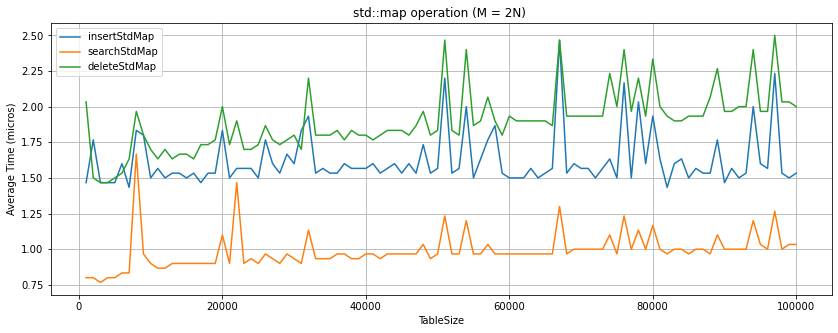

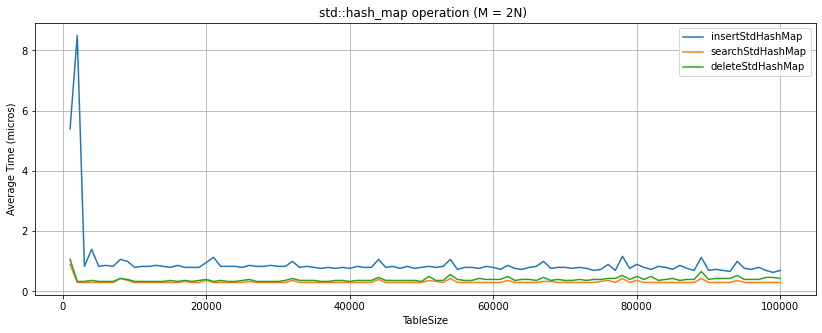

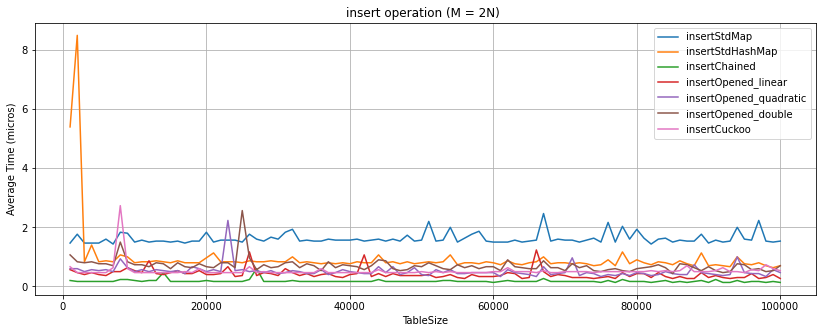

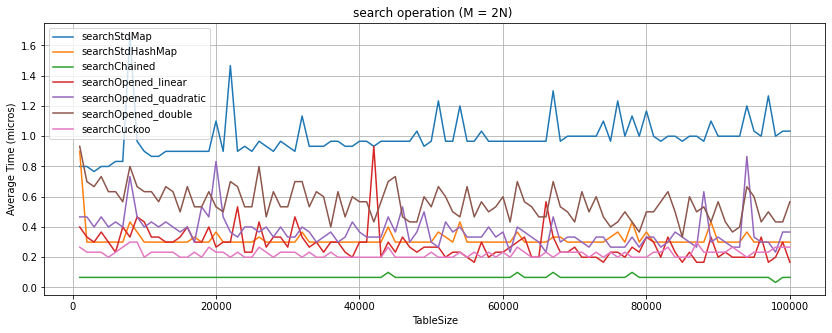

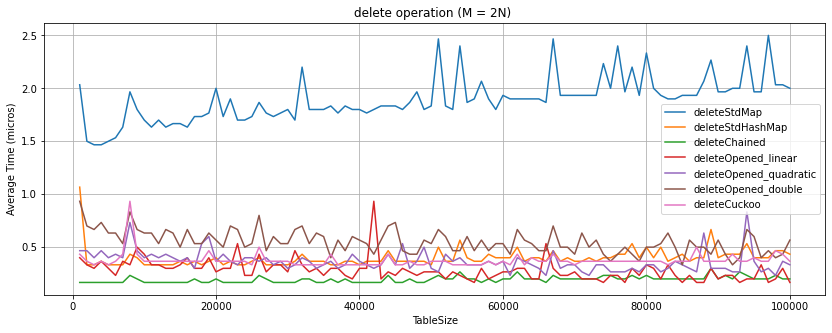

In [20]:
print('Performance on random integer numbers')

get_charts(performanceIntegerM2N, groups)

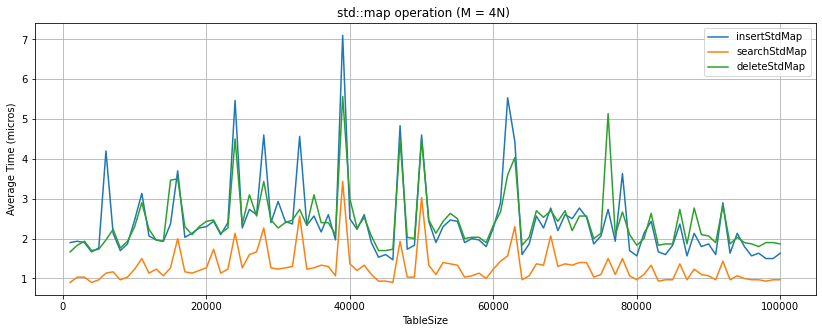

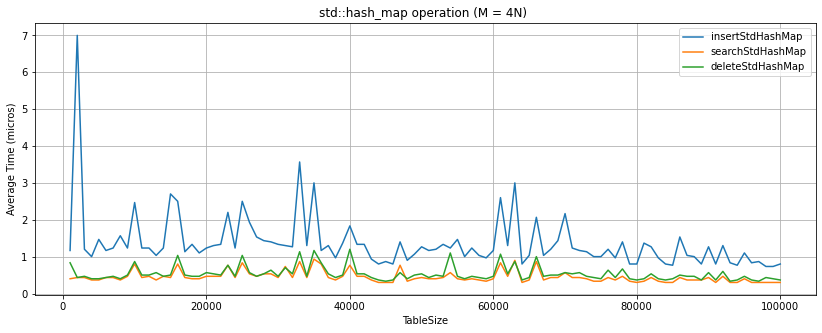

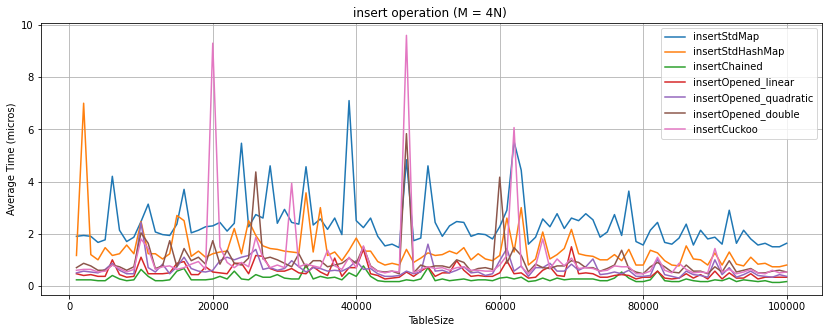

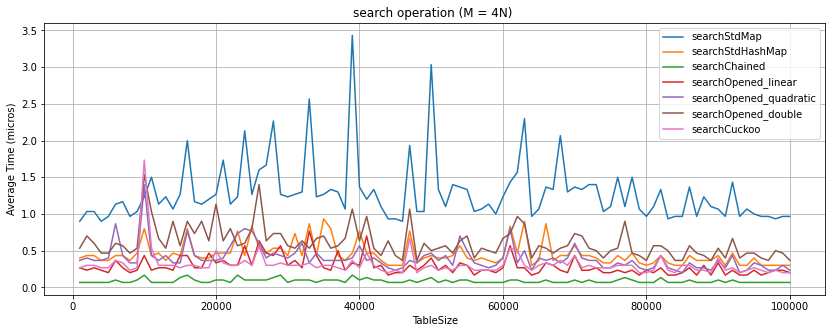

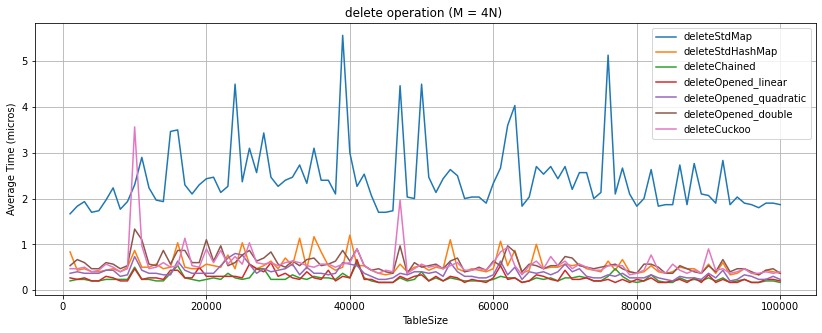

In [21]:
get_charts(performanceIntegerM4N, groups)

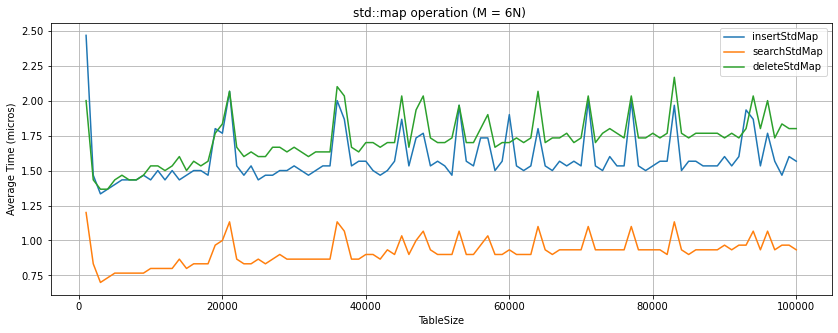

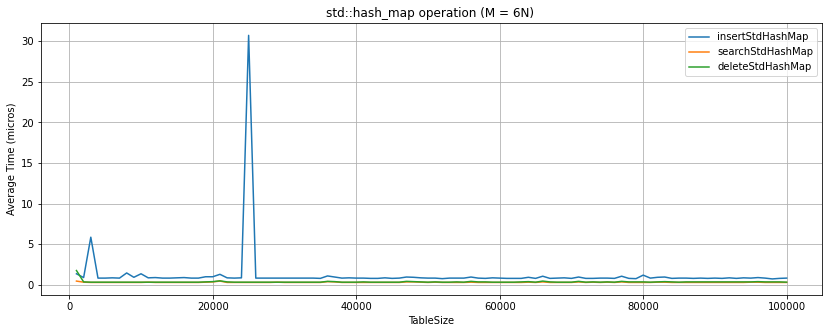

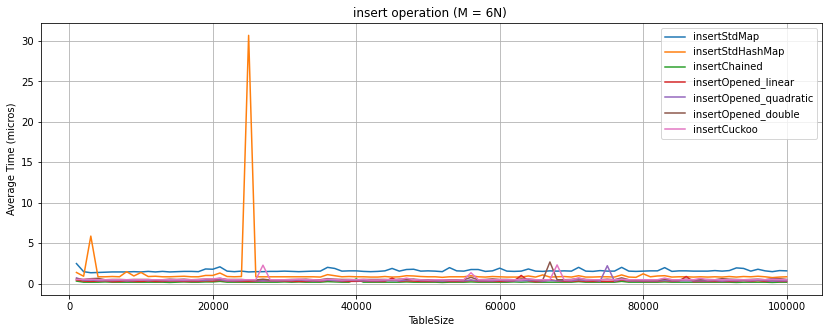

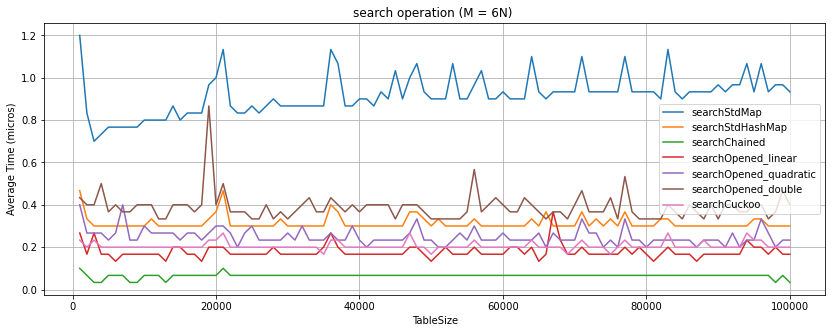

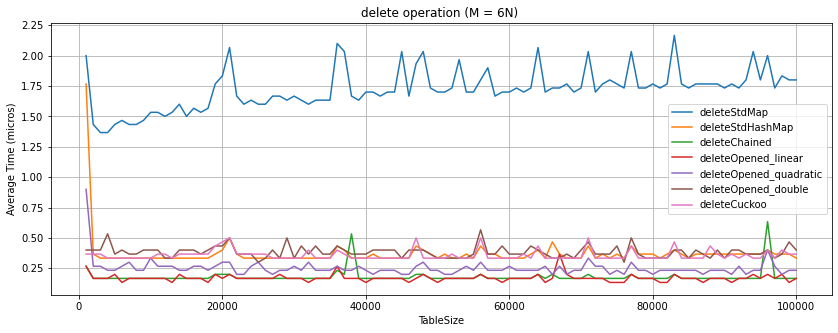

In [22]:
get_charts(performanceIntegerM6N, groups)

## Performance on random strings

Performance on random strings


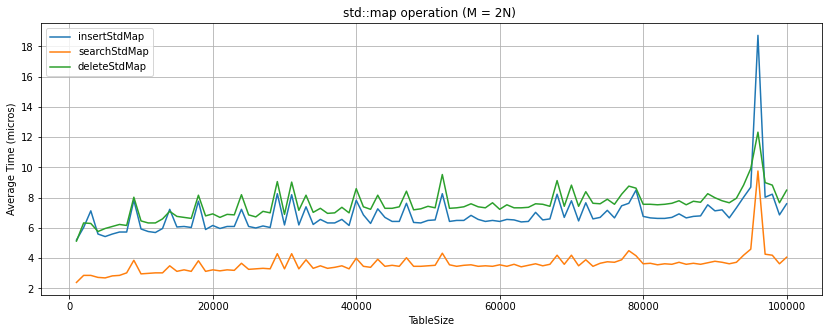

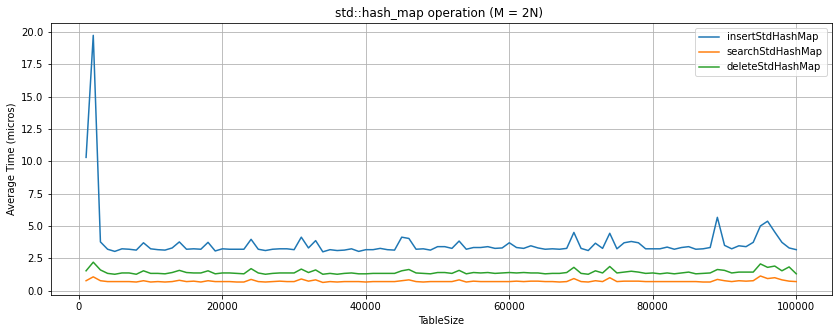

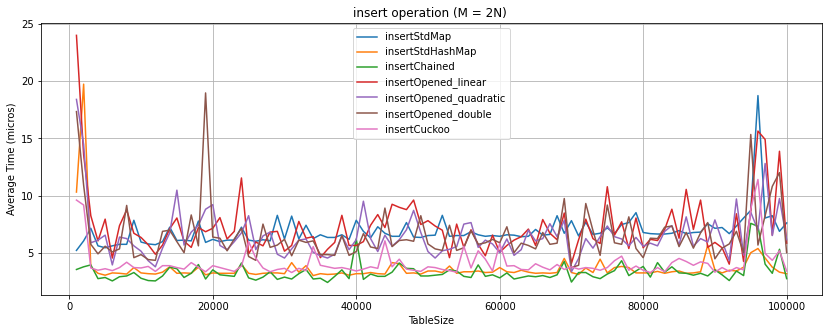

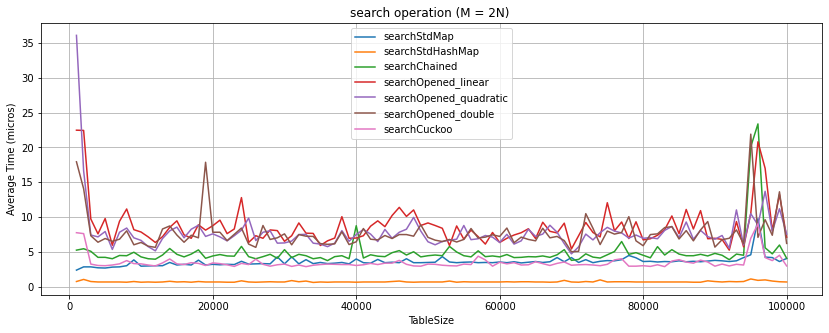

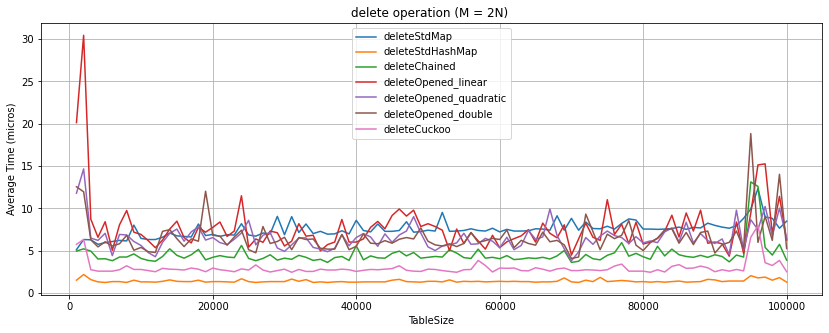

In [23]:
print('Performance on random strings')

get_charts(performanceStringM2N, groups)

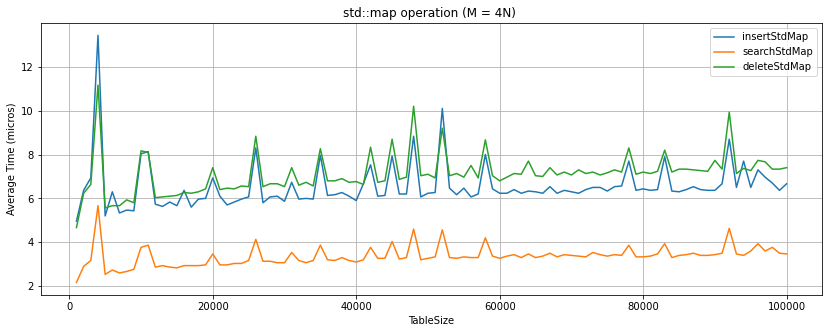

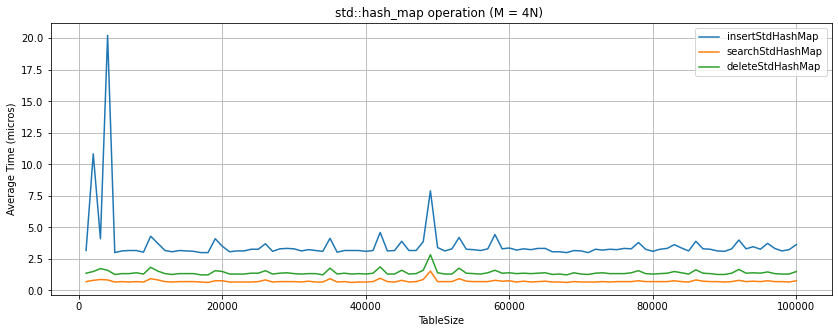

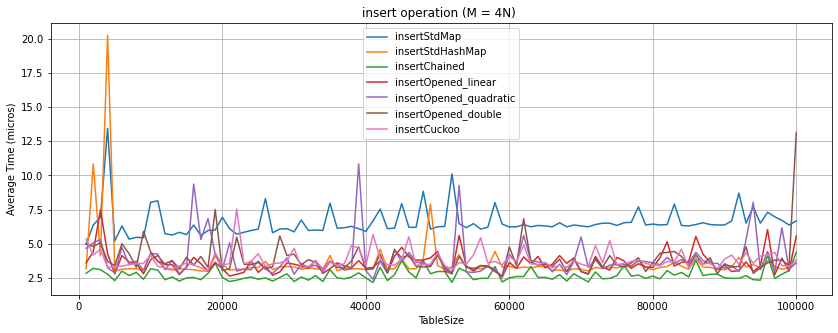

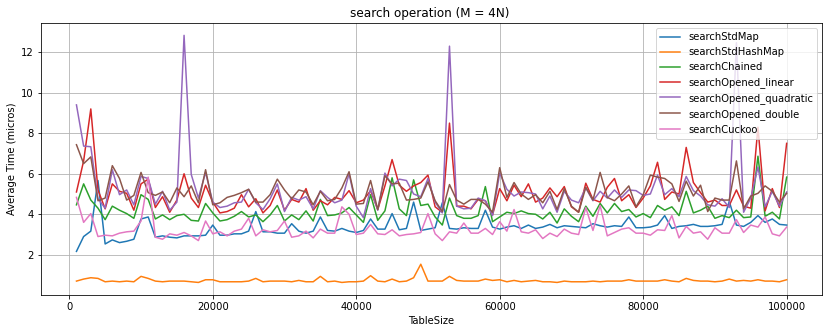

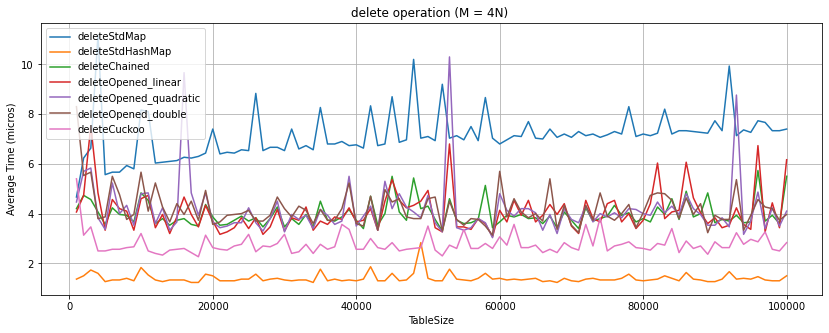

In [24]:
get_charts(performanceStringM4N, groups)

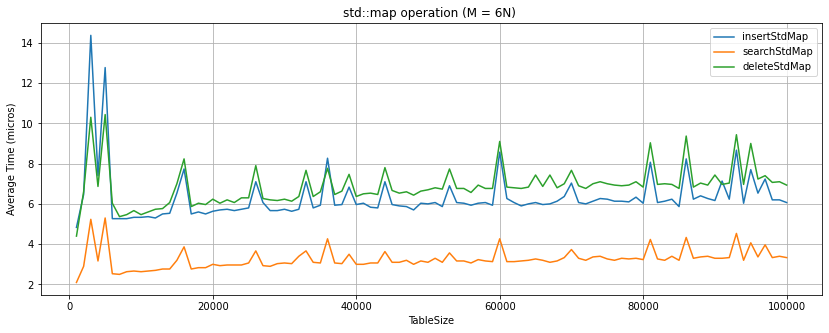

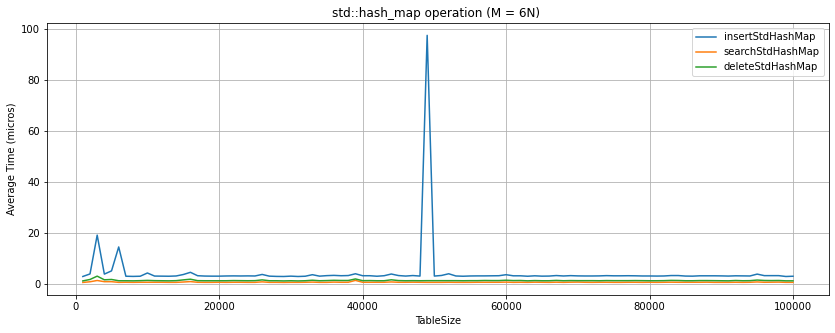

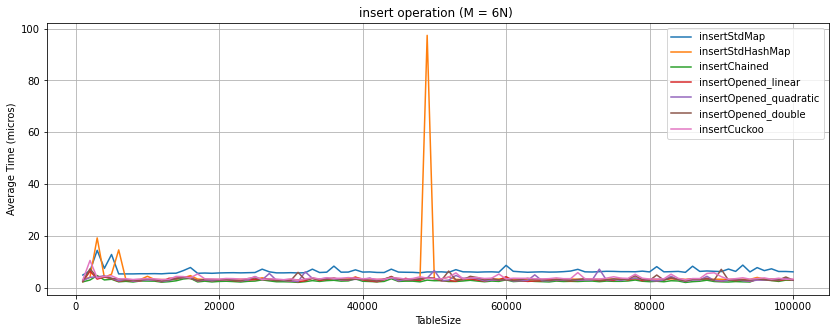

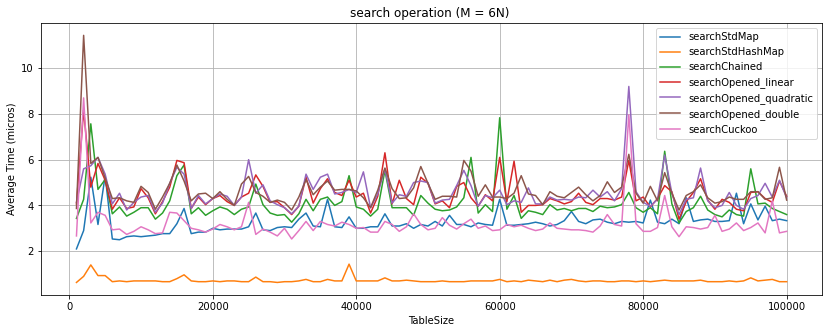

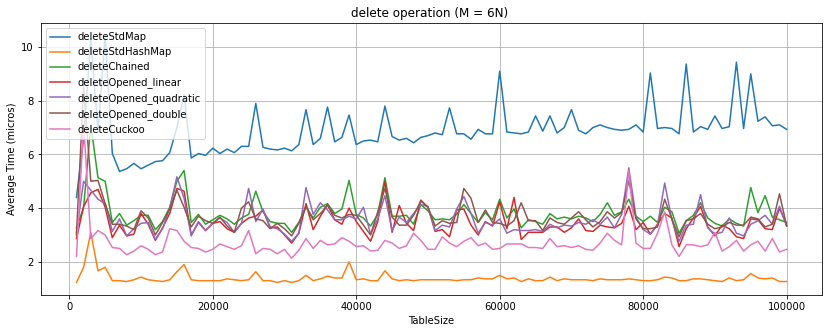

In [25]:
get_charts(performanceStringM6N, groups)

## Real life data test

В качестве real life данных был использован словарь, содержащий 58 013 английских слов. На основе словаря были созданы хэш-таблицы и для каждой хэш-таблицы было призведено заданное число операций из заданной тестовой подвыборке, после чего время операции было усреднено.

In [159]:
import random
import warnings
warnings.simplefilter('ignore')

In [222]:
reallife = pd.read_csv('data/input/dictionary.csv')
print(len(reallife))
reallife.sample(15)

58013


,Unnamed: 0,0
20005,20030,foetal
55366,55463,userfriendly
34084,34139,nutcracker
51430,51517,tetrahedra
28783,28830,launcher
5587,5590,bops
26944,26987,interior
14951,14968,disturbs
39645,39705,prunes
22310,22342,graphically


Real life data hashing
---

**STD::MAP**

Average insert time: `11.72 microsec`

Average search time: `5.05 microsec`

Average delete time: `7.92 microsec`


**STD::HASH_MAP**

Average insert time: `3.05 microsec`

Average search time: `0.73 microsec`

Average delete time: `1.3 microsec`

**Chained Hash map**


Average insert time: `3.02 microsec`

Average search time: `5.45 microsec`

Average delete time: `7.03 microsec`

**Opened Hash map __LINEAR__**

Average insert time: `95.19 microsec`

Average search time: `102.27 microsec`

Average delete time: `148.94 microsec`

**Opened Hash map __QUADRATIC__**

Average insert time: `18.65 microsec`

Average search time: `19.71 microsec`

Average delete time: `18.51 microsec`

**Opened Hash map __DOUBLE__**

Average insert time: `18.89 microsec`

Average search time: `19.91 microsec`

Average delete time: `19.68 microsec`

**Cuckoo Hash Map**

Average insert time: `2.99 microsec`

Average search time: `2.72 microsec`

Average delete time: `2.31 microsec`